## 0. Imports and Auxiliary functions

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import ward, dendrogram
import matplotlib.pyplot as plt
%matplotlib inline


def create_dendrogram(linkage_matrix_param, titles_param):
    
    fig, ax = plt.subplots(figsize=(10, 15)) # set size
    ax = dendrogram(linkage_matrix_param, orientation="right", labels=titles_param);

    plt.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)

    plt.tight_layout() #show plot with tight layout

    #uncomment below to save the dendrogram image to a files
    #plt.savefig('dendrogram.png', dpi=200) #save figure as ward_clusters

## 1. Read corpus

In [2]:
import os.path
from nltk.corpus import PlaintextCorpusReader

## This is the folder containing your files
corpus_root = './Harry_Potter_comments_clean/'

my_corpus = PlaintextCorpusReader(corpus_root, '.*txt')

files = []
titles = []

for file in my_corpus.fileids():
    files.append(corpus_root + file)
    titles.append(os.path.splitext(file)[0])

## 2. Vectorize your corpus using TF-IDF

In [3]:
vectorizer = TfidfVectorizer(stop_words='english', input='filename', min_df=0.2, max_df=0.8) 
tfidf_model = vectorizer.fit_transform(files)

## 3. Calculate Cosine Distance among documents

In [4]:
dist = 1 - cosine_similarity(tfidf_model)

## 4. Run the hierarchical clustering algorithm

In [5]:
linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

## 5. Create the dendrogram visualization of the hierarchical clustering

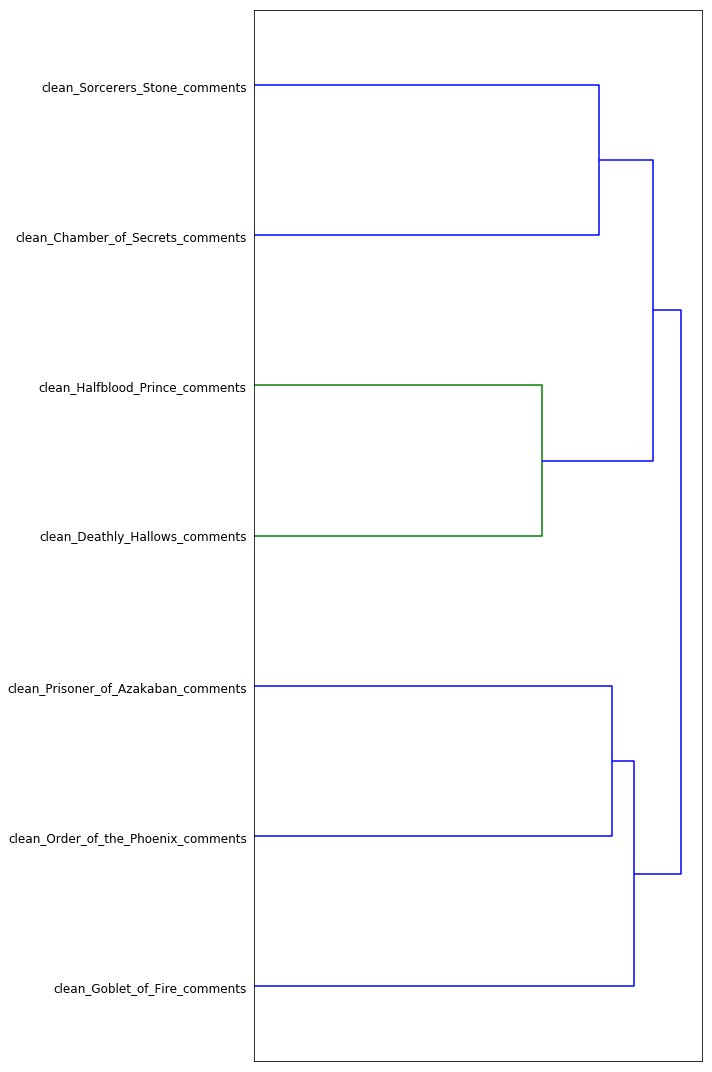

In [6]:
create_dendrogram (linkage_matrix, titles)